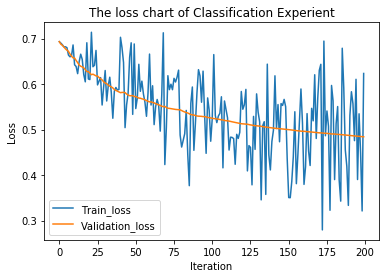

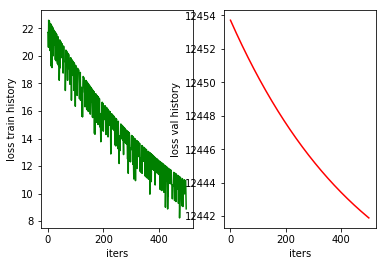

In [7]:
import numpy as np
import pandas as pd
import math
import random
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt


def get_batch(X, y, batch_size):
    """
    将输入的X和y切割出batch_size 大小
    :param X:特征
    :param y:标签
    :param batch_size:小组大小
    :return:切割结果
    """
    tn, tm = X.shape
    array_index = np.arange(0, tn, 1)
    np.random.shuffle(array_index)
    array_index_batch = array_index[:batch_size]
    X_batch = X[array_index_batch, :]
    y_batch = y[array_index_batch, :]
    return X_batch, y_batch

def sigmoid(x, w):
    """
    逻辑回归梯度激活函数
    :param x:特征
    :param w:参数
    :return:g(x)
    """
    wx = x.dot(w)
    return 1 / (1 + np.exp(wx * -1.0))


def logistic_regression_batch_gradient(X_train, y_train, X_val, y_val):
    """
    逻辑回归+小批量梯度下降
    :param X_train:训练集特征
    :param y_train:训练集标签
    :param X_val:验证集特征
    :param y_val:验证集标签
    :return:

    """
    # 转换数据格式
    X_train = X_train.todense()
    sample_train, label_train = X_train.shape
    y_train[y_train == -1] = 0

    X_val = X_val.todense()
    sample_val, label_val = X_val.shape
    X_val = np.column_stack((X_val, np.zeros(sample_val)))
    y_val[y_val == -1] = 0

    # 参数w全零初始化
    w = np.zeros(shape=(label_train, 1))

    # batch大小
    batch_size = 2 ** 4

    # 学习率
    alpha = 0.01

    # 迭代次数
    iterations = 200

    # 存储损失函数集
    loss_batch_history = []
    loss_val_history = []

    # 迭代
    for i in range(iterations):
        # 获取小批量数据集
        X_train_batch, y_train_batch = get_batch(X_train, y_train, batch_size)

        # 计算训练集的损失函数
        gz_train = sigmoid(X_train_batch, w)
        matrix_loss = np.array(y_train_batch) * np.array(np.log(gz_train)) + np.array(1 - y_train_batch) * np.array(np.log(1 - gz_train))
        loss_batch = np.sum(matrix_loss) / batch_size * -1.0
        loss_batch_history.append(loss_batch)

        # 计算验证集的损失函数
        gz_val = sigmoid(X_val, w)
        matrix_loss_val = np.array(y_val) * np.array(np.log(gz_val)) + np.array(1 - y_val) * np.array(np.log(1 - gz_val))
        loss_val = np.sum(matrix_loss_val) / sample_val * -1.0
        loss_val_history.append(loss_val)

        # 梯度下降更新参数w
        w = w - alpha / batch_size * X_train_batch.T.dot((sigmoid(X_train_batch, w)) - y_train_batch)

    # 作图
    plot(loss_batch_history, loss_val_history)

def plot(loss_train_history, loss_val_history):
    """
    画图函数
    :param loss_train_history:一个batch小组的损失集
    :param loss_val_history:验证集的损失
    :return: 无
    """
    plt.plot(list(range(len(loss_train_history))), loss_train_history, label='Train_loss')
    plt.plot(list(range(len(loss_val_history))), loss_val_history, label='Validation_loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('The loss chart of Classification Experient')
    plt.legend(loc='best')
    plt.show()

def sigmoid_svm(x, w, b):
    """
    SVM核函数，此为线性不可分
    :param x:特征
    :param w:特征对应参数
    :param b:为w0
    :return:g(x)
    """
    wx = x.dot(w)
    return wx + b


def svm_batch_gradient(X_train, y_train, X_val, y_val):
    """
    SVM + 小批量梯度下降
    :param X_train:训练集特征
    :param y_train:训练集标签
    :param X_val:验证集特征
    :return:
    """
    # 转换数据格式
    X_train_svm = X_train.todense()
    sample_train, label_train = X_train.shape
    y_train[y_train == -1] = 0

    X_val_svm = X_val.todense()
    sample_val, label_val = X_val.shape
    X_val_svm = np.column_stack((X_val_svm, np.zeros(sample_val)))
    y_val[y_val == -1] = 0

    # 参数随机初始化
    # w = np.zeros(shape=(label_train, 1))

    w_svm = np.random.rand(label_train, 1)
    b = random.random()

    # 学习率
    alpha = 0.001

    # batch大小
    batch_size = 2 ** 2

    # 惩罚参数
    C = 1

    # 迭代次数
    iterations = 500

    # 损失函数值的集
    loss_batch_train_history = []
    loss_batch_val_history = []

    # 迭代
    for i in range(iterations):
        # 获取小批量数据
        X_train_svm_batch, y_train_svm_bacth = get_batch(X_train_svm, y_train, batch_size)
        # 核函数
        kernel = sigmoid_svm(X_train_svm_batch, w_svm, b)
        # 计算训练集损失函数
        tsigmod = 1 - np.array(kernel) * np.array(y_train_svm_bacth)
        ttsigmod = tsigmod.copy()
        ttsigmod[ttsigmod < 0] = 0
        loss_train = w_svm.T.dot(w_svm) / 2 + C * np.sum(ttsigmod)
        loss_batch_train_history.append(loss_train[0, 0])
        # 核函数
        kernel_val = sigmoid_svm(X_val_svm, w_svm, b)
        # 计算验证集损失函数
        tsigmod_val = 1 - np.array(kernel_val) * np.array(y_val)
        ttsigmod_val = tsigmod_val.copy()
        ttsigmod_val[ttsigmod_val < 0] = 0
        loss_val = w_svm.T.dot(w_svm) / 2 + C * np.sum(ttsigmod_val)
        loss_batch_val_history.append(loss_val[0, 0])

        # 更新参数w and b
        gwx = np.mat(np.zeros(X_train_svm_batch.shape))
        gbx = np.random.random(batch_size)

        for i in range(batch_size):
            if (tsigmod[i] >= 0):
                gwx[i] = - np.array(X_train_svm_batch[i]) * y_train_svm_bacth[i]
                gbx[i] = - y_train_svm_bacth[i]
            else:
                gwx[i] = np.zeros((1, X_train_svm_batch.shape[1]))
                gbx[i] = 0
        w_svm = w_svm * (1 - alpha) - alpha * C * np.sum(gwx, axis=0).T
        b = b - alpha * C * np.sum(gbx)

#     print(loss_batch_train_history)
#     print(loss_batch_val_history)
    svm_plot(loss_batch_train_history,loss_batch_val_history)

def svm_plot(loss_train_history,loss_val_history):
        ax1 = plt.subplot(1, 2, 1)
        plt.plot(range(len(loss_train_history)),loss_train_history, c='g')
        ax1.set_xlabel('iters')
        ax1.set_ylabel('loss train history')
        ax2 = plt.subplot(1, 2, 2)
        plt.plot(range(len(loss_val_history)),loss_val_history, c='r')
        ax2.set_xlabel('iters')
        ax2.set_ylabel('loss val history')
        plt.show()

if __name__ == '__main__':
    # 读取数据
    data_train = load_svmlight_file("a9a.txt")
    data_val = load_svmlight_file("a9a.t")

    X_train = data_train[0]
    y_train = data_train[1]

    X_val = data_val[0]
    y_val = data_val[1]

    y_train = y_train.reshape((y_train.size, 1))
    y_val = y_val.reshape((y_val.size, 1))

    logistic_regression_batch_gradient(X_train, y_train, X_val, y_val)

    svm_batch_gradient(X_train, y_train, X_val, y_val)